<a href="https://colab.research.google.com/github/okech-glitch/python/blob/main/Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


from google.colab import files

# Upload file
uploaded = files.upload()

Saving Climate Change.zip to Climate Change.zip


In [ ]:
import zipfile
import pandas as pd

# Unzip the file
with zipfile.ZipFile('Climate Change.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Check the files in the unzipped directory
import os
extracted_files = os.listdir('/content/')
print("Files extracted:", extracted_files)

# Load the dataset (replace 'co2_emissions_kt_by_country.csv' with the actual filename if it's different)
dataset_filename = 'co2_emissions_kt_by_country.csv'  # Adjust the filename if needed
df = pd.read_csv(f'/content/{dataset_filename}')

# Display the first few rows of the dataset
df.head()


Files extracted: ['.config', 'co2_emissions_kt_by_country.csv', 'Climate Change.zip', 'sample_data']


,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [ ]:
# Display basic statistics about the dataset
print("Dataset Statistics:")
print(df.describe())


Dataset Statistics:
               year         value
count  13953.000000  1.395300e+04
mean    1990.732316  8.254983e+05
std       17.187585  2.788923e+06
min     1960.000000 -8.067400e+01
25%     1976.000000  1.100000e+03
50%     1992.000000  1.390000e+04
75%     2006.000000  1.642779e+05
max     2019.000000  3.434401e+07


In [ ]:
# Display dataset information
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB
None


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
country_code    0
country_name    0
year            0
value           0
dtype: int64


In [ ]:
# Check unique values in each column
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")



Unique Values in Each Column:
country_code: 255 unique values
country_name: 256 unique values
year: 60 unique values
value: 9537 unique values


In [ ]:
# Check for discrepancies between country_code and country_name
unique_country_codes = df['country_code'].unique()
unique_country_names = df['country_name'].unique()

print(f"Number of unique country codes: {len(unique_country_codes)}")
print(f"Number of unique country names: {len(unique_country_names)}")

# Check if all country names have corresponding codes
name_code_pairs = df[['country_name', 'country_code']].drop_duplicates()
print("\nUnique country name and code pairs:")
print(name_code_pairs)


Number of unique country codes: 255
Number of unique country names: 256

Unique country name and code pairs:
                      country_name country_code
0                            Aruba          ABW
57     Africa Eastern and Southern          AFE
117                    Afghanistan          AFG
177     Africa Western and Central          AFW
237                         Angola          AGO
...                            ...          ...
13712                       Kosovo          XKX
13721                  Yemen, Rep.          YEM
13781                 South Africa          ZAF
13841                       Zambia          ZMB
13897                     Zimbabwe          ZWE

[256 rows x 2 columns]


In [ ]:
# Identify rows with unique country names that don’t match any country codes
unique_names_without_codes = df[~df['country_name'].isin(df['country_code'].unique())]
print("\nUnique country names without matching country codes:")
print(unique_names_without_codes)



Unique country names without matching country codes:
      country_code country_name  year         value
0              ABW        Aruba  1960  11092.675000
1              ABW        Aruba  1961  11576.719000
2              ABW        Aruba  1962  12713.489000
3              ABW        Aruba  1963  12178.107000
4              ABW        Aruba  1964  11840.743000
...            ...          ...   ...           ...
13948          ZWE     Zimbabwe  2015  12430.000305
13949          ZWE     Zimbabwe  2016  11020.000458
13950          ZWE     Zimbabwe  2017  10340.000153
13951          ZWE     Zimbabwe  2018  12380.000114
13952          ZWE     Zimbabwe  2019  11760.000229

[13953 rows x 4 columns]


In [ ]:
# Find unique country names that might be problematic
unique_country_names = df['country_name'].unique()
print("Unique country names:")
print(unique_country_names)


Unique country names:
['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'Antigua and Barbuda'
 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas, The'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil'
 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Chile' 'China' "Cote d'Ivoire" 'Cameroon'
 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros' 'Cabo Verde'
 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao' 'Cayman Islands'
 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)' 'Europe & Central A

In [ ]:
# List entries with potential special cases or aggregated data
special_cases = df[df['country_name'].str.contains("Africa|Kosovo|Yemen|Rep.")]
print("Special cases or aggregated data:")
print(special_cases[['country_name', 'country_code']].drop_duplicates())


Special cases or aggregated data:
                                            country_name country_code
57                           Africa Eastern and Southern          AFE
177                           Africa Western and Central          AFW
1800                            Central African Republic          CAF
2280                                    Congo, Dem. Rep.          COD
2340                                         Congo, Rep.          COG
3122                                  Dominican Republic          DOM
3602                                    Egypt, Arab Rep.          EGY
5930                                  Iran, Islamic Rep.          IRN
6500                                     Kyrgyz Republic          KGZ
6709                                         Korea, Rep.          KOR
8045                          Middle East & North Africa          MEA
8465   Middle East & North Africa (excluding high inc...          MNA
10190                          Korea, Dem. People's Rep.

In [ ]:
# Standard ISO country codes (partial example)
iso_country_codes = [
    'ABW', 'AFG', 'AGO', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS',
    # Add more ISO country codes here
]

# Check if any country codes in your dataset are not in the standard list
invalid_country_codes = set(df['country_code'].unique()) - set(iso_country_codes)
print("Invalid country codes (not in standard list):")
print(invalid_country_codes)


Invalid country codes (not in standard list):
{'GRD', 'BRN', 'JPN', 'SLE', 'IBD', 'NAM', 'SYC', 'CHE', 'AFE', 'CUW', 'GBR', 'KWT', 'UKR', 'PYF', 'SVK', 'SYR', 'BFA', 'PAK', 'PHL', 'COM', 'EUU', 'MNE', 'TKM', 'PER', 'CYM', 'EAP', 'MMR', 'ETH', 'STP', 'GHA', 'WLD', 'ZWE', 'LKA', 'KGZ', 'ROU', 'LAO', 'LBN', 'OSS', 'NZL', 'TSA', 'XKX', 'CEB', 'OMN', 'LTE', 'MEA', 'VCT', 'VNM', 'ITA', 'AFW', 'HKG', 'WSM', 'BEN', 'CAN', 'CYP', 'HRV', 'LIC', 'TUV', 'GIB', 'NOR', 'MOZ', 'BLR', 'UGA', 'BRA', 'TLS', 'SGP', 'BGD', 'FIN', 'KEN', 'GMB', 'ARE', 'PRT', 'MLT', 'GTM', 'SST', 'MNA', 'EAS', 'ISL', 'MEX', 'POL', 'FSM', 'BLZ', 'IDA', 'CAF', 'DJI', 'MIC', 'MDA', 'LIE', 'CSS', 'PNG', 'OED', 'PRK', 'LAC', 'PRY', 'SXM', 'BWA', 'MNG', 'RUS', 'SWZ', 'CHL', 'NIC', 'TZA', 'JAM', 'PSS', 'IDX', 'HND', 'NRU', 'TEC', 'GNQ', 'TUR', 'GAB', 'GEO', 'BIH', 'ESP', 'LMC', 'THA', 'VEN', 'TLA', 'TMN', 'GIN', 'IRL', 'EGY', 'URY', 'FRO', 'KNA', 'LDC', 'MYS', 'FJI', 'CZE', 'EAR', 'LCA', 'EMU', 'PRE', 'BRB', 'TCD', 'SEN', 'SSA', '

In [ ]:
# Example standardization
df['country_name'] = df['country_name'].replace({
    'Africa Eastern and Southern': 'Eastern Africa',
    'Africa Western and Central': 'Western Africa',
    'Yemen, Rep.': 'Yemen'
    # Add more replacements as needed
})

# Check updated country names
print("Updated country names:")
print(df['country_name'].unique())


Updated country names:
['Aruba' 'Eastern Africa' 'Afghanistan' 'Western Africa' 'Angola'
 'Albania' 'Andorra' 'Arab World' 'United Arab Emirates' 'Argentina'
 'Armenia' 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan'
 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria'
 'Bahrain' 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize'
 'Bermuda' 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan'
 'Botswana' 'Central African Republic' 'Canada'
 'Central Europe and the Baltics' 'Switzerland' 'Chile' 'China'
 "Cote d'Ivoire" 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia'
 'Comoros' 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba'
 'Curacao' 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)' 'Europe & Central Asia'
 'Ecuador' 'Egypt, A

In [ ]:
# List of standard countries (ISO codes) for filtering
standard_countries = [
    'ABW', 'AFG', 'AGO', 'ALB', 'DZA', 'AND', 'ATG', 'ARG', 'ARM', 'AUS',
    'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLZ', 'BMU', 'BOL', 'BRA',
    'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CAF', 'TCD', 'CHL',
    'CHN', 'COL', 'COM', 'COG', 'CRI', 'CUB', 'DMA', 'DNK', 'DOM', 'DZA',
    'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA',
    'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIN', 'GNB', 'GUY', 'HTI', 'HND',
    'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRL', 'IRN', 'IRQ', 'ISR', 'ITA',
    'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KOR', 'KWT', 'LAO', 'LVA',
    'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MDV',
    'MLI', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MNG', 'MAR', 'MOZ',
    'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NZL', 'NIC', 'NGA', 'NER', 'NGA',
    'OMN', 'PAK', 'PLW', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT',
    'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SYC', 'SLE', 'SGP', 'SOM',
    'ZAF', 'SSU', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TJK', 'TUR', 'TKM',
    'TUV', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'UZB', 'VUT', 'VEN', 'VNM',
    'YEM', 'ZMB', 'ZWE'
]

# Filter the dataset for standard countries
df_standard_countries = df[df['country_code'].isin(standard_countries)]


In [ ]:
# List of special categories to remove
special_categories = [
    'Arab World', 'Central African Republic', 'Central Europe and the Baltics',
    'Caribbean small states', 'East Asia & Pacific', 'Euro area', 'European Union',
    'Fragile and conflict affected situations', 'High income', 'IDA & IBRD total',
    'IDA total', 'IDA blend', 'Latin America & Caribbean', 'Least developed countries: UN classification',
    'Low income', 'Low & middle income', 'Middle East & North Africa', 'Middle income',
    'North America', 'OECD members', 'Other small states', 'Pre-demographic dividend',
    'Small states', 'South Asia', 'Sub-Saharan Africa', 'Upper middle income', 'World'
]

# Remove rows with special categories
df_cleaned = df[~df['country_name'].isin(special_categories)]


In [ ]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Display the number of duplicate rows
num_duplicates = duplicates.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows (if any)
print(duplicates)


Number of duplicate rows: 0
Empty DataFrame
Columns: [country_code, country_name, year, value]
Index: []


In [ ]:
# Check for duplicate entries based on specific columns
duplicates_columns = df[df.duplicated(subset=['country_code', 'year'])]

# Display the number of duplicate entries based on these columns
num_duplicates_columns = duplicates_columns.shape[0]
print(f"Number of duplicate entries based on 'country_code' and 'year': {num_duplicates_columns}")

# Display the duplicate entries based on these columns (if any)
print(duplicates_columns)


Number of duplicate entries based on 'country_code' and 'year': 0
Empty DataFrame
Columns: [country_code, country_name, year, value]
Index: []


In [ ]:
# Check for duplicate entries based on specific columns
duplicates_columns = df[df.duplicated(subset=['country_code', 'year'])]

# Display the number of duplicate entries based on these columns
num_duplicates_columns = duplicates_columns.shape[0]
print(f"Number of duplicate entries based on 'country_code' and 'year': {num_duplicates_columns}")

# Display the duplicate entries based on these columns (if any)
print(duplicates_columns)


Number of duplicate entries based on 'country_code' and 'year': 0
Empty DataFrame
Columns: [country_code, country_name, year, value]
Index: []


In [ ]:
# Drop duplicates based on specific columns
df_cleaned_columns = df.drop_duplicates(subset=['country_code', 'year'])

# Verify if duplicates have been removed
num_duplicates_columns_after = df_cleaned_columns.shape[0] - df.shape[0]
print(f"Number of rows removed based on 'country_code' and 'year': {num_duplicates_columns_after}")


Number of rows removed based on 'country_code' and 'year': 0


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handling missing values (example: fill with mean)
df['value'].fillna(df['value'].mean(), inplace=True)


Missing values in each column:
country_code    0
country_name    0
year            0
value           0
dtype: int64


In [ ]:
# Convert 'year' to a categorical type if needed
df['year'] = df['year'].astype('category')

# Convert 'value' to numeric type if needed
df['value'] = pd.to_numeric(df['value'], errors='coerce')


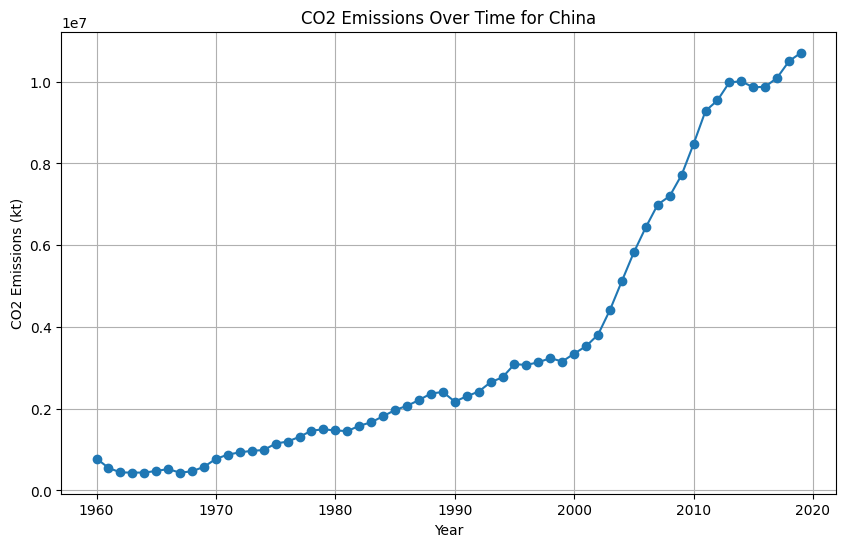

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific country
country_data = df[df['country_name'] == 'China']

# Plot CO2 emissions over time
plt.figure(figsize=(10, 6))
plt.plot(country_data['year'], country_data['value'], marker='o')
plt.title('CO2 Emissions Over Time for China')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()


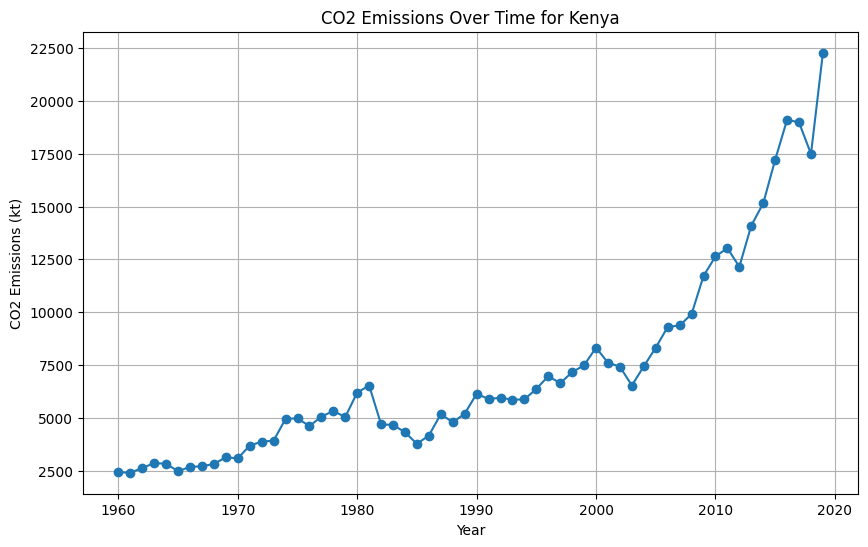

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific country
country_data = df[df['country_name'] == 'Kenya']

# Plot CO2 emissions over time
plt.figure(figsize=(10, 6))
plt.plot(country_data['year'], country_data['value'], marker='o')
plt.title('CO2 Emissions Over Time for Kenya')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()


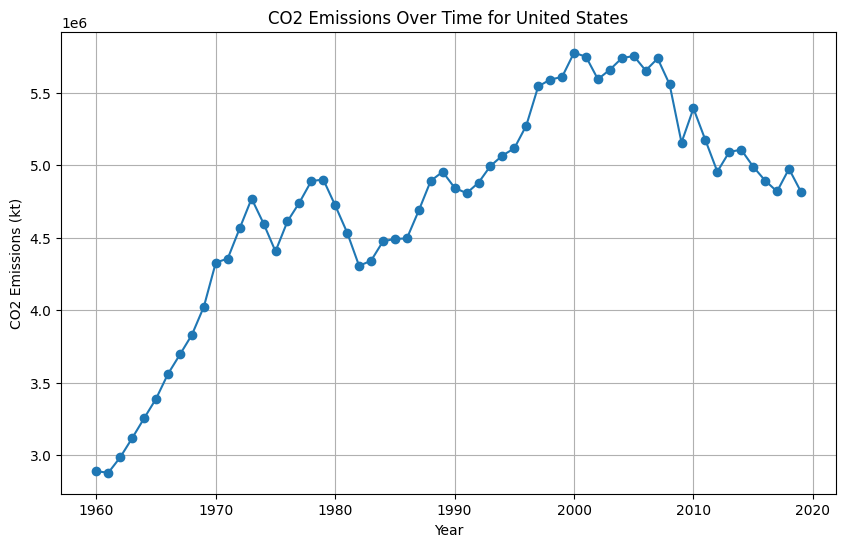

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific country
country_data = df[df['country_name'] == 'United States']

# Plot CO2 emissions over time
plt.figure(figsize=(10, 6))
plt.plot(country_data['year'], country_data['value'], marker='o')
plt.title('CO2 Emissions Over Time for United States')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()


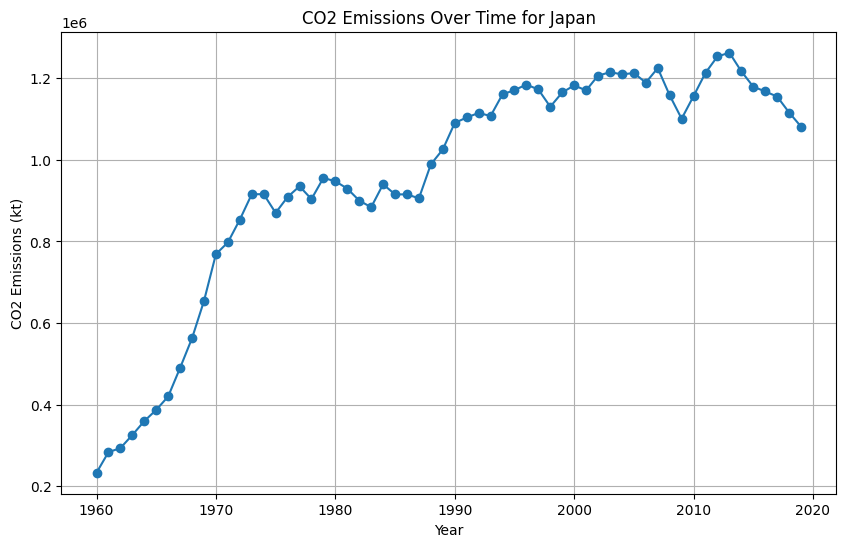

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific country
country_data = df[df['country_name'] == 'Japan']

# Plot CO2 emissions over time
plt.figure(figsize=(10, 6))
plt.plot(country_data['year'], country_data['value'], marker='o')
plt.title('CO2 Emissions Over Time for Japan')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()


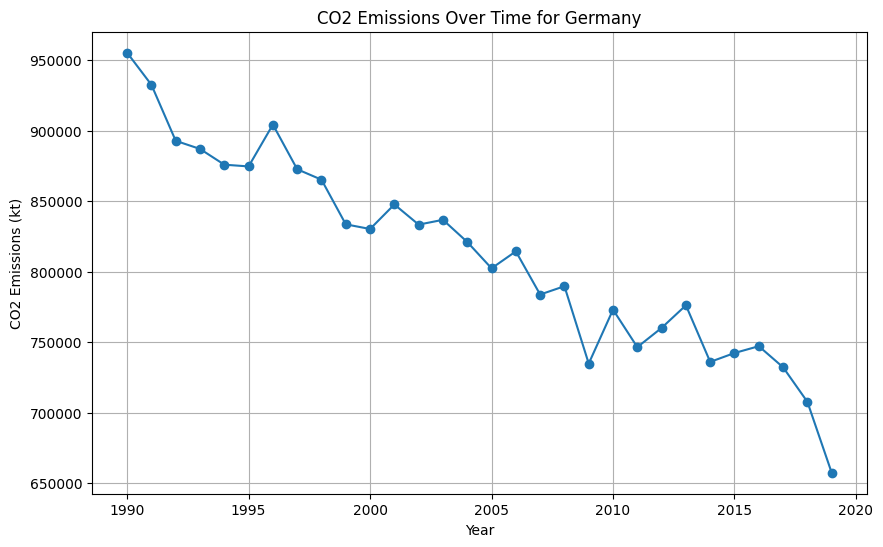

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific country
country_data = df[df['country_name'] == 'Germany']

# Plot CO2 emissions over time
plt.figure(figsize=(10, 6))
plt.plot(country_data['year'], country_data['value'], marker='o')
plt.title('CO2 Emissions Over Time for Germany')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()


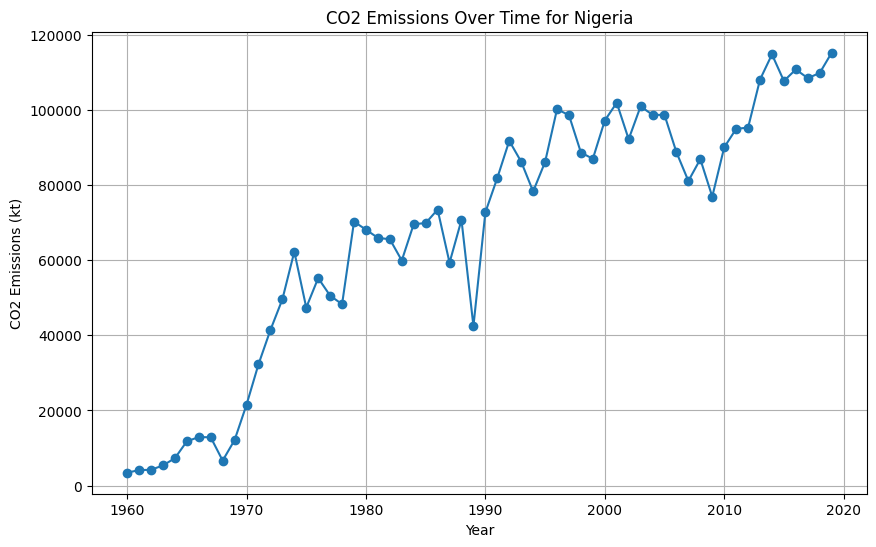

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific country
country_data = df[df['country_name'] == 'Nigeria']

# Plot CO2 emissions over time
plt.figure(figsize=(10, 6))
plt.plot(country_data['year'], country_data['value'], marker='o')
plt.title('CO2 Emissions Over Time for Nigeria')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'co2_emissions.csv'
dataset_filename = 'co2_emissions_kt_by_country.csv'  # Adjust the filename if needed
# Adjust the filename if needed
df = pd.read_csv('')  # Load your data into a DataFrame

# Filter data for a few countries
countries = ['United States', 'China', 'India', 'Kenya', 'Germany']
comparison_data = df[df['country_name'].isin(countries)]

# Plot CO2 emissions for these countries
plt.figure(figsize=(12, 8))
for country in countries:
    country_data = comparison_data[comparison_data['country_name'] == country]
    plt.plot(country_data['year'], country_data['value'], label=country)

plt.title('CO2 Emissions Comparison')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
# Descriptive statistics for 'value'
statistics = df['value'].describe()
print("Descriptive statistics for CO2 emissions:")
print(statistics)


Descriptive statistics for CO2 emissions:
count    1.395300e+04
mean     8.254983e+05
std      2.788923e+06
min     -8.067400e+01
25%      1.100000e+03
50%      1.390000e+04
75%      1.642779e+05
max      3.434401e+07
Name: value, dtype: float64


<ipython-input-37-7d6ac60fe4ab>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_trend = df.groupby('year')['value'].mean()


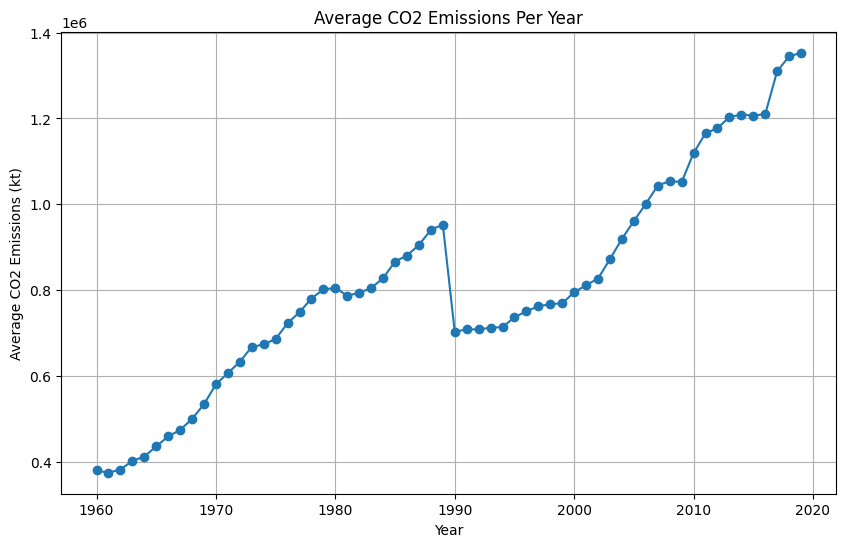

In [ ]:
# Group by year and calculate mean CO2 emissions
yearly_trend = df.groupby('year')['value'].mean()

# Plot the yearly trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o')
plt.title('Average CO2 Emissions Per Year')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (kt)')
plt.grid(True)
plt.show()


In [ ]:
# Sort data by country and year
df_sorted = df.sort_values(by=['country_name', 'year'])

# Calculate year-over-year growth
df_sorted['growth'] = df_sorted.groupby('country_name')['value'].pct_change()

# Display the updated DataFrame
print(df_sorted.head())


    country_code country_name  year    value    growth
117          AFG  Afghanistan  1960  414.371       NaN
118          AFG  Afghanistan  1961  491.378  0.185841
119          AFG  Afghanistan  1962  689.396  0.402985
120          AFG  Afghanistan  1963  707.731  0.026596
121          AFG  Afghanistan  1964  839.743  0.186528


In [ ]:
df['year'] = pd.to_datetime(df['year'], format='%Y')


In [ ]:
time_series_data = df.groupby(['year', 'country_name'])['value'].sum().reset_index()


<ipython-input-41-f4de81b7794f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_series_data = df.groupby(['year', 'country_name'])['value'].sum().reset_index()


In [ ]:
country_data = country_data.dropna()


In [ ]:
country_data['value'].fillna(country_data['value'].mean(), inplace=True)


In [ ]:
# Check if 'year' column exists before trying to modify it
if 'year' in country_data.columns:
    country_data.loc[:, 'year'] = pd.to_datetime(country_data['year'], format='%Y')
else:
    print("Warning: 'year' column not found in DataFrame.")

In [ ]:
print(country_data.columns)


Index(['country_name', 'value'], dtype='object')


In [ ]:
print(country_data.head())
print(country_data.index)


Empty DataFrame
Columns: [country_name, value]
Index: []
DatetimeIndex([], dtype='datetime64[ns]', name='year', freq='A-DEC')


In [ ]:
# Check for missing values
print(country_data.isnull().sum())

# Drop or impute missing values
country_data = country_data.dropna()  # Drop missing values for simplicity


country_name    0
value           0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Example DataFrame setup
# country_data = pd.read_csv('/path/to/your/co2_emissions_kt_by_country.csv')
# country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')

# Set 'year' as index if needed
if 'year' in country_data.columns:
    country_data.set_index('year', inplace=True)

# Drop missing values
country_data = country_data.dropna()

# Decompose the time series
decomposition = seasonal_decompose(country_data['value'], model='additive', period=12)  # Adjust period as needed

# Plot the decomposition
decomposition.plot()
plt.show()


ValueError: x must have 2 complete cycles requires 24 observations. x only has 0 observation(s)